<a href="https://colab.research.google.com/github/raissamennezes/twitter/blob/master/Minera%C3%A7%C3%A3o_de_dados_do_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install twitter

In [0]:
#importação das bibliotecas
import twitter
import json
from collections import Counter
import matplotlib as plt
import matplotlib.pyplot as pyplot 
from plotly.offline import iplot
import plotly.graph_objs as go
import pandas as pd
import psycopg2
import sys
from urllib.parse import unquote


#nuvem de palavras
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 


In [0]:
#autenticação com twitter
CONSUMER_KEY = "vBdHOHaNYcCD4nlHwEyhjObeW"
CONSUMER_SECRET = "IWEhqemOvBnEpBS1aJqKQwKlkeHBh5dQrw7NhFlmErAjfUCkcR"
OAUTH_TOKEN = "48925565-MrIzYkytFTJje3VO30vJTueB7nw99WXSzoreQOl81"
OAUTH_TOKEN_SECRET = "x5NNQQ3Ht27zPsUHaZh02r7O7eM5wDhQKBoONpfQp11Dy"

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

In [0]:
#buscando por hashtag específica

q = 'brasil'
count = 100

search_results = twitter_api.search.tweets(q=q, count = count)

statuses = search_results['statuses']
print(statuses)


[{'created_at': 'Mon May 27 01:12:23 +0000 2019', 'id': 1132816789434511360, 'id_str': '1132816789434511360', 'text': 'RT @LaRoja: 👏 ¡Ya están los 23 de #LaRoja para @CopaAmerica!\n🇨🇱 Estos son los elegidos por Reinaldo Rueda para representar a la Selección e…', 'truncated': False, 'entities': {'hashtags': [{'text': 'LaRoja', 'indices': [34, 41]}], 'symbols': [], 'user_mentions': [{'screen_name': 'LaRoja', 'name': 'Selección Chilena', 'id': 2842600971, 'id_str': '2842600971', 'indices': [3, 10]}, {'screen_name': 'CopaAmerica', 'name': 'Copa América', 'id': 3159711265, 'id_str': '3159711265', 'indices': [47, 59]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 83997036, 'id_str': '8399

In [0]:
#Lista de text dos tweets

status_text = [status['text']
                for status in statuses]

ids = [status['id']
                for status in statuses]


#Lista de screen_name dos tweets 
screen_names = [user_mention['screen_name']
                for status in statuses
                  for user_mention in status ['entities']['user_mentions']]

#Lista de hashtags dos tweets
hashtags = [hashtag['text']
           for status in statuses 
           for hashtag in status['entities']['hashtags']]


  
#data = (status_text, hashtags, screen_names [:10])
#print(data)

#Faz split para pegar cada palavra separada
words = [w
          for t in status_text
            for w in t.split()]

In [0]:
#Printa os resultados em json 
print(json.dumps(ids [0:5], indent=1))
print(json.dumps(status_text[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 1132816789434511360,
 1132816789405147137,
 1132816789379923969,
 1132816789136715776,
 1132816788864020481
]
[
 "RT @LaRoja: \ud83d\udc4f \u00a1Ya est\u00e1n los 23 de #LaRoja para @CopaAmerica!\n\ud83c\udde8\ud83c\uddf1 Estos son los elegidos por Reinaldo Rueda para representar a la Selecci\u00f3n e\u2026",
 "RT @kookfancy: ESTOY HECHA PIJA PORQUE JUNGKOOK TAMBI\u00c9N SE TERMIN\u00d3 EMOCIONANDO, MERECE TANTO ESTAR PISANDO AQUEL ESCENARIO Y EL AMOR DE TOD\u2026",
 "RT @stigmabrasil: \u3164\u3164 \u3164  \u3164\ud83c\udde7\ud83c\uddf7 BTS NO BRASIL \ud83c\udde7\ud83c\uddf7\n\n\u3164\u3164 \u3164\u3164     2015 | 2017 | 2019 https://t.co/knVNPSviU6",
 "@hxjinnie apaguei todo meu apoio a ele eh isto Brasil vai participante n\u00e3o bolsominion irra",
 "RT @slowtaehyung: Namjoon contou os dias pra voltar no brasil\nEles treinaram portugu\u00eas e jungkook ainda descobriu o meme do momento pra fal\u2026"
]
[
 "LaRoja",
 "CopaAmerica",
 "kookfancy",
 "stigmabrasil",
 "hxjinnie"
]
[
 "L

In [0]:
#conectando com o banco de dados postgres 
from psycopg2.extras import DictCursor
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "postgres",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "twitter")

    cursor = connection.cursor()
    # Print propriedades da conexão
    print ( connection.get_dsn_parameters(),"\n")
    # Print versão do postgres
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)


{'options': '', 'sslcompression': '1', 'user': 'postgres', 'tty': '', 'port': '5432', 'target_session_attrs': 'any', 'host': '127.0.0.1', 'sslmode': 'prefer', 'dbname': 'twitter', 'krbsrvname': 'postgres'} 

You are connected to -  ('PostgreSQL 10.4 on x86_64-apple-darwin13.4.0, compiled by Apple LLVM version 6.0 (clang-600.0.57) (based on LLVM 3.5svn), 64-bit',) 



In [0]:
#Faz insert dos tweets no banco

for xp in statuses:
    SQL = "insert into tweets(tweet) values(%s);"
    tweets = (json.dumps(xp),)
    cursor.execute(SQL,tweets)
    connection.commit()

In [0]:
#Faz select dos tweets
tweet = cursor.execute("select text from vw_tweets;")
tweet = cursor.fetchone()
print(tweet)
    

('RT @nelsonpaffi: Código de ética do PSDB isenta Aécio https://t.co/vjzlAxtilE Qual a novidade? Esse partido é irmão do PT. Tudo sempre igua…',)


In [0]:
#cria dataset contendo tweets inteiros
data = []
label = ['screen_name', 'text','hashtags', 'id']

tweets = [
    #armazena os valores em uma lista
    [status['user']['screen_name'],
      status['text'],
      status['entities']['hashtags'],
      status['id']
    ]
    for status in statuses
]


tw = pd.DataFrame.from_dict(tweets, orient='columns')
tw.columns = label

tw.head()
tw.count()

screen_name    73
text           73
hashtags       73
id             73
dtype: int64

In [0]:
#cria dataset contendo o contador de retweets
data = []
label = ['retweets', 'screen_name', 'text', 'hashtags', 'id']

retweets = [
    #armazena os valores em uma lista
    [status['retweet_count'],
      status['retweeted_status']['user']['screen_name'],
      status['text'],
      status['entities']['hashtags'],
      status['id']
    ]
    
    #se o status atender a condição (se forem retweets)
    for status in statuses
      if 'retweeted_status' in status.keys()
]


rt = pd.DataFrame.from_dict(retweets, orient='columns')
rt.columns = label

rt.head()
rt.count()

retweets       63
screen_name    63
text           63
hashtags       63
id             63
dtype: int64

In [0]:
data = pd.Series(data=rt.retweets, index=rt.retweets)

In [0]:
#Análise descritiva do campo de contagem de retweets
rt['retweets'].describe()

count       63.000000
mean      1072.079365
std       1805.257843
min          2.000000
25%         97.000000
50%        413.000000
75%       1126.000000
max      12141.000000
Name: retweets, dtype: float64

In [0]:
rt['retweets'].mode()

0     725
1    2036
dtype: int64

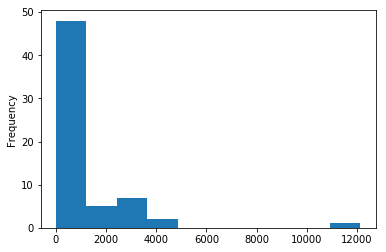

In [0]:
#mostrar histograma do atributo retweets para verificar a dispersão:

rt['retweets'].plot.hist()


In [0]:
#Cálculo de amplitude de retweets

amplitude_rt = rt['retweets'].max() - rt['retweets'].min()
amplitude_rt

12139

In [0]:
#Computar diversidade lexical dos tweets

def lexical_diversity (tokens):
  return len(set(tokens))/len(tokens)

def average_words (statuses):
  total_words = sum([len(s.split())for s in statuses])
  return total_words/len(statuses)

print (lexical_diversity(words))

0.5928825622775801


In [0]:
#tokenizando tweets 
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
tk = tw['text'].apply(tt.tokenize)
print(tk)

0     [RT, @LaRoja, :, 👏, ¡, Ya, están, los, 23, de,...
1     [RT, @kookfancy, :, ESTOY, HECHA, PIJA, PORQUE...
2     [RT, @stigmabrasil, :, ㅤㅤ, ㅤ, ㅤ, 🇧, 🇷, BTS, NO...
3     [@hxjinnie, apaguei, todo, meu, apoio, a, ele,...
4     [RT, @slowtaehyung, :, Namjoon, contou, os, di...
5     [RT, @ARMYSUnitedBR, :, [, ⚠, ️, ], O, Yoongi,...
6     [RT, @JeonJungkook_BR, :, [, VIDEO, ], 26.05, ...
7     [RT, @Univers_Bangtan, :, Namjoon, :, ", Vocês...
8     [RT, @jeonabi__, :, ", ¿, Saben, que, los, amo...
9     [RT, @lovieseokjin, :, Jin, :, ", Estou, apaix...
10    [RT, @vantegk, :, hoseok, e, yoongi, fugindo, ...
11    [RT, @JeonJungkook_BR, :, [, VIDEO, ], 26.05, ...
12    [RT, @angelsBTS_, :, A, PARTIR, DE, HOJE, NÃO,...
13    [RT, @tataesingle, :, Nunca, esqueçam, esse, d...
14    [Subam, a, hashtag, galera, !, Deem, rt, pra, ...
15    [RT, @sensestae, :, ", a, paixão, do, Brasil, ...
16    [RT, @carlysemi, :, Mano, ., Os, discursos, de...
17    [RT, @bbcbrasil, :, #MaisLidas, ', Esse, g

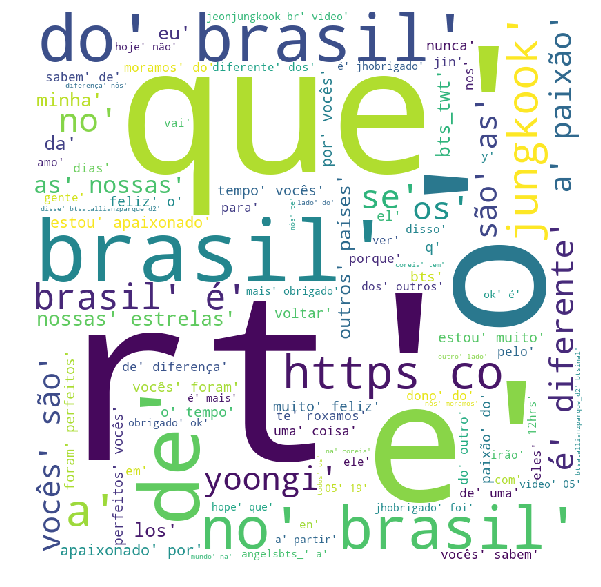

In [0]:
from wordcloud import WordCloud, STOPWORDS 
import pandas as pd 
  
 
  
comment_words = ' '
#stopwords = set(STOPWORDS) 

#aplicando as stopwords
stopwords = ['e', 'rt', 'q', 'o', 'a', 'que', 'se', 'as', 'os', 'rt,', ':', '"']
comment_words = ' '



for val in tk: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    #converte os tokens em minúsculo
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot WordCloud                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Encerra conexão com banco
if(connection):
            cursor.close()
            connection.close()
            print("Conexão com o Postgres Encerrada")

Conexão com o Postgres Encerrada
